# PROJECT TITLE : Food101 Vision Model Classification
# AUTHOR : Omar Mahmoud Abdel Rahman                            
# Date : 4/11/2024

# Let's write some code to visualize an image

1. Get all of the image paths
2. Pick a random image path using Python's random.choise()
3. Get the image class using `pathlib.Path.parent.stem`
4. Since we are working with images, let's open the image with Python's PIL
5. we will then show the image and print the metadata  

cuda
Random image Path : Created_Data\pizza_sushi_steak_20 percent\test\pizza\1202689.jpg
Image_class : pizza
Image hight : 382
Image width : 512


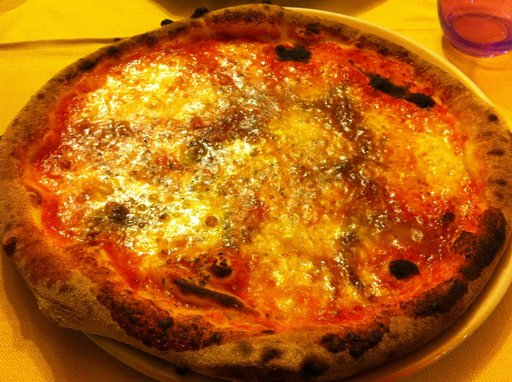

In [66]:
import random
from PIL import Image
from tqdm.auto import tqdm
# import pathlib
import pathlib

# import timer
from timeit import default_timer as timer

#Making deivce agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)


#Image paths
data_root = pathlib.Path('./Created_Data/pizza_sushi_steak_20 percent')
# set seed 
#random.seed(42)

# 1.Get all the image paths
image_path_list = list(data_root.glob("*/*/*.jpg"))

# 2. Pick a random image path and plot it
random_image_path = random.choice(image_path_list)

# 3. Get the image class ("There are two way to get the class name of an image")
class_name = random_image_path.parts[-2]
class_name_another_method = random_image_path.parent.stem

# 4. Let's open an image using PIL ("Python Image Liberary")
image = Image.open(random_image_path)

# 5. print metadata
print(f"Random image Path : {random_image_path}")
print(f"Image_class : {class_name}")
print(f"Image hight : {image.height}")
print(f"Image width : {image.width}")
image

Image shape : (512, 512, 3) | Image Class Name : sushi


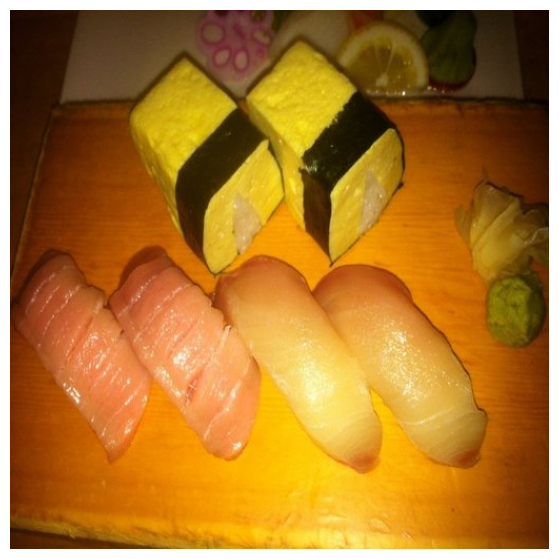

In [2]:
# import matplotlib, numpy
import numpy as np
import matplotlib.pyplot as plt

image_as_array = np.asarray(image)
plt.figure(figsize=(10, 7))
plt.imshow(image_as_array)
print(f"Image shape : {image_as_array.shape} | Image Class Name : {class_name}")
plt.axis("off");

# image = plt.imread(random_image_path,format='jpg')
# print(f"Image_class : {class_name}")
# print(f"Image shape : {image.shape}")
# plt.imshow(image, cmap='RdPu')
# plt.axis('off')

## 3. Transforming data 

Before we can use our image data with Pytorch: 
1. Turn your target data into tensors
2. Turn it into `torch.utils.data.Dataset` and subsequentily a `torch.utils.data.dataloader()`



In [3]:
#import torch 
import torch
from torch import nn
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

print(torchvision.__version__)
print(torch.__version__)

0.16.1+cu121
2.1.1+cu121


In [4]:
# 3.1 Transforming data with torchvision.transforms
# we need some steps of transformation for the model to work correctly with the data

transform_image = transforms.Compose([
    #Resize the imahe into 64x64
    transforms.Resize((64, 64)),
    # Flip the images randomly on the horizontal axis
    transforms.RandomHorizontalFlip(p = 0.8),
    # Converting images into pytorch tensor
    transforms.ToTensor()
])

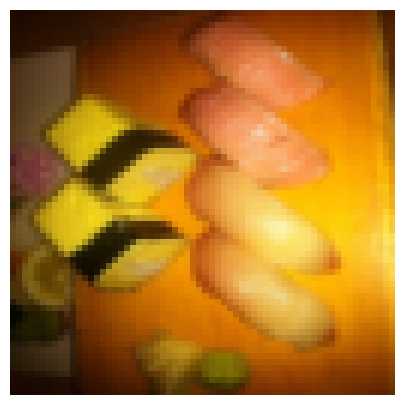

In [5]:
# applying transformation for a single image
plt.figure(figsize = (5, 5))
transformed_image = transform_image(image)
image_as_array.shape, transformed_image.shape
plt.imshow(transformed_image.permute([2, 1, 0]))
plt.axis(False);

In [6]:
def plot_transformed_images(image_paths, transform, num =3, seed = None):
    """
    Selects random images from a path of images and loads/transforms them then plot the original versus the transformed version 
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k = num)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows = 1, ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f'Orignial\nSize: {f.size}')
            ax[0].axis(False)
            # Transforms the image
            transformed_image = transform(f).permute([1, 2, 0])
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
            ax[1].axis(False)
            fig.suptitle(f"class : {image_path.parts[-2]}", fontsize = 17)
        # plt.subplot(num_rows, num_colms, iterable)
        # plt.imshow(np.asarray(image))
        # plt.axis(False);
        # plt.show()
        # # plt.subplot(num_rows, num_colms, iterable+1)
        # plt.imshow(transformed_image.permute([2, 1, 0]))
        # plt.axis(False);
        # plt.show()



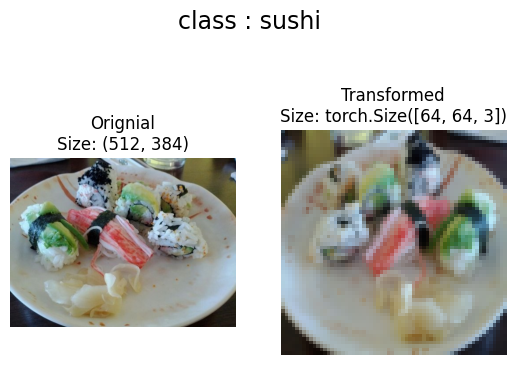

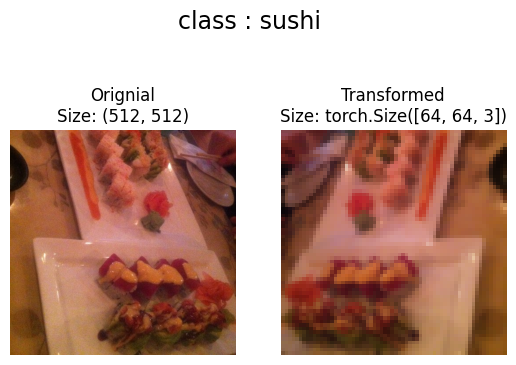

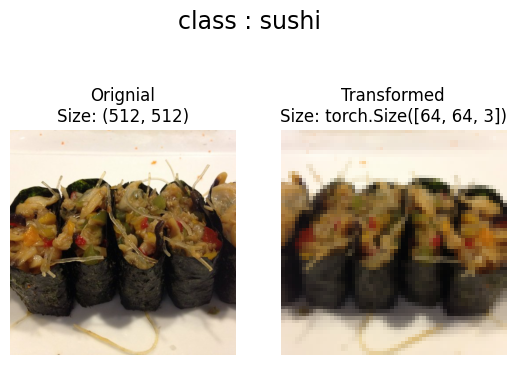

In [7]:
plot_transformed_images(image_paths=image_path_list, transform=transform_image, num = 3)

## 4.1 Option one : loading image data using `ImageFolder`
We can load image classification data using `torchvision.datasets.ImageFloder`


In [8]:
# Trying trivial augmentation
train_transform = transforms.Compose([
    transforms.Resize(size = (224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins =31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size = (224, 224)),
    transforms.ToTensor()
])

In [9]:
# Use ImageFloder to create data set

# creating Path object to the data directory
train_root = pathlib.Path('D:\courses\DS&ML Course\Machine learning notebooks\Youtube note books\Data\pizza_steak_sushi_20_perecent/train')
test_root = pathlib.Path('D:\courses\DS&ML Course\Machine learning notebooks\Youtube note books\Data\pizza_steak_sushi_20_perecent/test')

train_data = datasets.ImageFolder(root = train_root,
                                  transform=train_transform,# a transform for the data
                                  target_transform=None # transform for the target
                                  ) 
test_data = datasets.ImageFolder(root = test_root,
                                 transform= test_transform,
                                 target_transform= None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 450
     Root location: D:\courses\DS&ML Course\Machine learning notebooks\Youtube note books\Data\pizza_steak_sushi_20_perecent\train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 150
     Root location: D:\courses\DS&ML Course\Machine learning notebooks\Youtube note books\Data\pizza_steak_sushi_20_perecent\test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [10]:
# Get class names as a list
class_names = train_data.classes
class_names

# we can also get the class names as a dict
class_name_dict = train_data.class_to_idx

In [11]:
# Getting train and test lengthes
len(train_data), len(test_data)

(450, 150)

In [12]:
# raw data for a record sample
train_data.samples[0]


('D:\\courses\\DS&ML Course\\Machine learning notebooks\\Youtube note books\\Data\\pizza_steak_sushi_20_perecent\\train\\pizza\\1008844.jpg',
 0)

In [13]:
# Turning our datasets into dataloaders
train_data_loader = DataLoader(dataset= train_data,
                               batch_size= 32,
                               shuffle = True)

test_data_loader = DataLoader(dataset=test_data,
                              batch_size=32,
                              shuffle = False)

In [14]:
#iterating on one batch of training data
batch_sample, batch_label = next(iter(train_data_loader))

len(train_data_loader),batch_sample.shape

(15, torch.Size([32, 3, 224, 224]))

# 05 Data augmentation Techniques

In [15]:
# Trying trivial augmentation
train_transform = transforms.Compose([
    transforms.Resize(size = (224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins =31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size = (224, 224)),
    transforms.ToTensor()
])

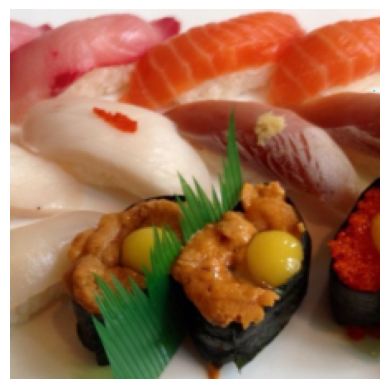

In [16]:
# Testing our Augmentation Pipeline
random_image_path = random.choice(image_path_list)

random_image_path
image = Image.open(random_image_path)

test_transformation = train_transform(image)

plt.imshow(test_transformation.permute([1, 2, 0]))
plt.axis(False);

In [17]:
# Next we want to create a BaseLineModel to test our Performance and make an output whatever it looks like
class BaseLineModel(nn.Module):
    def __init__(self,
                 input_shape : int,
                 hidden_units : int,
                 output_shape : int):
        super().__init__()
        
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = (3, 3),
                      stride= 1,
                      padding = 0),
            nn.ReLU(),

            nn.Conv2d(in_channels = hidden_units,
                      out_channels=hidden_units,
                      kernel_size = (3, 3),
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride = 2)
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = (3, 3),
                      stride= 1,
                      padding = 0),
            nn.ReLU(),

            nn.Conv2d(in_channels = hidden_units,
                      out_channels=hidden_units,
                      kernel_size = (3, 3),
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride = 2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units * 53 * 53,
                      out_features = output_shape)
        )
    def forward(self, x : torch.Tensor) -> torch.Tensor:
        x = self.conv_block1(x)
        # print(f"the shape of image after block1 : {x.shape}")
        x = self.conv_block2(x)
        # print(f"the shape of image after block2 : {x.shape}")
        x = self.classifier(x)
        # print(f"shape of image after classifier : {x.shape} ")
        return x

In [18]:
RANDOM_TENSOR = torch.rand([3, 224,224])
model_0 = BaseLineModel(input_shape = 3,
                        hidden_units = 10,
                        output_shape = len(class_names))

In [42]:
model_0(RANDOM_TENSOR.unsqueeze(0)).shape

torch.Size([1, 3])

In [21]:
#torchinfo package to get an idea of the shapes going through our model

from torchinfo import summary

BATCH_SIZE = 16
LENGTH = 224
NUM_CHANNEL = 3
WIDTH = 224

summary(model_0, input_size = (BATCH_SIZE, NUM_CHANNEL, LENGTH, WIDTH))

Layer (type:depth-idx)                   Output Shape              Param #
BaseLineModel                            [16, 3]                   --
├─Sequential: 1-1                        [16, 10, 110, 110]        --
│    └─Conv2d: 2-1                       [16, 10, 222, 222]        280
│    └─ReLU: 2-2                         [16, 10, 222, 222]        --
│    └─Conv2d: 2-3                       [16, 10, 220, 220]        910
│    └─ReLU: 2-4                         [16, 10, 220, 220]        --
│    └─MaxPool2d: 2-5                    [16, 10, 110, 110]        --
├─Sequential: 1-2                        [16, 10, 53, 53]          --
│    └─Conv2d: 2-6                       [16, 10, 108, 108]        910
│    └─ReLU: 2-7                         [16, 10, 108, 108]        --
│    └─Conv2d: 2-8                       [16, 10, 106, 106]        910
│    └─ReLU: 2-9                         [16, 10, 106, 106]        --
│    └─MaxPool2d: 2-10                   [16, 10, 53, 53]          --
├─Sequentia

In [22]:
#choosing loss and optimzer 

loss_fnc = nn.CrossEntropyLoss()
optimzer = torch.optim.Adam(params = model_0.parameters(),
                           lr = 0.01)


# accuracy function
def accuracy_fn(y_pred, y_true):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [23]:
# Create train and test loop functions

#setting device agnostic code 
device = 'cpu'

def train_step(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fnc : torch.nn.Module,
               optimzer : torch.optim.Optimizer,
               acc_fnc,
               device : torch.device = device):
    """Performce a training step on the dataloader"""
    train_loss = 0
    train_acc = 0
    model.to(device)
    model.train()
    for X, y in data_loader:
        # send the data to the target device        
        X, y = X.to(device), y.to(device)
        # Do forward path
        y_preds = model(X)
        #calculate the training loss
        loss = loss_fnc(y_preds, y)
        train_loss += loss.item()
        #optimzer zero grad
        optimzer.zero_grad()
        # loss backward
        train_acc += acc_fnc(y_preds.argmax(dim = 1), y)
        #Loss backward
        loss.backward()
        #optimzer step
        optimzer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    #return train loss and train acc
    return train_loss, train_acc


def test_step(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fnc : torch.nn.Module,
               acc_fnc,
               device : torch.device = device):
    """Performce a testing step on the dataloader"""

    model.to(device)
    test_loss = 0
    test_acc = 0
    model.eval()
    for X, y in data_loader:
        
        # Sending the data to target device
        X, y = X.to(device), y.to(device)

        #Forward path
        with torch.inference_mode():
            y_preds = model(X)
        
        # Calculate the loss
        loss = loss_fnc(y_preds, y)
        test_loss += loss.item()

        # Calculate test accuracy
        test_acc += acc_fnc(y_preds.argmax(dim = 1), y)
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    return test_loss, test_acc
    

In [24]:
def print_train_time(start, end, device=None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"\nTrain time on {device}: {total_time:.3f} seconds")
    return total_time

In [25]:
class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [30]:
def train(model: torch.nn.Module,
          train_data_loader:torch.utils.data.DataLoader,
          test_data_loader : torch.utils.data.DataLoader,
          optimzer : torch.optim.Optimizer,
          loss_fnc : torch.nn.Module,
          acc_fnc,
          calculate_train_time : bool = True,
          seed : int = None,
          device : torch.device = device,
          epochs : int = 10,
          early_stop : bool = False,
          patience : int = 1,
          min_delta : int = 0):
    
    if early_stop:
        early_stopper = EarlyStopper(patience=patience,
                                     min_delta = min_delta)
    else :
        early_stopper = None


    if calculate_train_time:
        train_time_start = timer()
    

    if seed : 
        torch.manual_seed(42)
        torch.cuda.manual_seed(42)

    results = {"train_loss_epoch" : [],
               "train_acc_epoch" : [],
               "test_loss_epoch" : [],
               "test_acc_epoch" : [],
               "Estimated_train_time" : None
               }
    
    

    model.to(device)
    for epoch in tqdm(range(epochs)):

        #printing epoch number
        print(f"Epoch: {epoch}\n --------")

        # One training step per epoch
        train_loss, train_acc = train_step(model = model,
                   data_loader= train_data_loader,
                   loss_fnc=loss_fnc,
                   optimzer = optimzer,
                   acc_fnc = acc_fnc,
                   device = device)
        results['train_loss_epoch'].append(train_loss), results['train_acc_epoch'].append(train_acc)
        # One testing step per epoch

        test_loss , test_acc = test_step(model = model,
                  data_loader = test_data_loader,
                  loss_fnc = loss_fnc,
                  acc_fnc = acc_fnc,
                  device = device)
        
        results['test_loss_epoch'].append(test_loss), results['test_acc_epoch'].append(test_acc)
        #print what is happening 
        print(f"Train Loss : {train_loss:.4f} | Train Accuravy : {train_acc:.2f}")
        print(f"Test Loss : {test_loss:.4f} | Test Accuracy : {test_acc:.2f}")

        #early stopping
        if early_stopper.early_stop(test_loss):
            print(f"we are in epoch {epoch}")
            break
    
    train_time_end = timer()


    if calculate_train_time:
        results['Estimated_train_time'] = print_train_time(start = train_time_start, end = train_time_end)
        print_train_time(start = train_time_start, end = train_time_end)
    return results

In [31]:
results = train(model_0,
      train_data_loader,
      test_data_loader,
      optimzer,
      loss_fnc,
      accuracy_fn,
      seed = 42,
      device = device,
      epochs = 10,
      early_stop=True,
      patience = 3,
      min_delta = 0.5)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
 --------


 10%|█         | 1/10 [00:13<01:59, 13.31s/it]

Train Loss : 1.0988 | Train Accuravy : 33.54
Test Loss : 1.0983 | Test Accuracy : 36.25
Epoch: 1
 --------


 20%|██        | 2/10 [00:26<01:46, 13.28s/it]

Train Loss : 1.0987 | Train Accuravy : 31.67
Test Loss : 1.0998 | Test Accuracy : 28.75
Epoch: 2
 --------


 30%|███       | 3/10 [00:39<01:32, 13.21s/it]

Train Loss : 1.0991 | Train Accuravy : 35.21
Test Loss : 1.1002 | Test Accuracy : 28.75
Epoch: 3
 --------


 40%|████      | 4/10 [00:52<01:19, 13.23s/it]

Train Loss : 1.0996 | Train Accuravy : 32.08
Test Loss : 1.1009 | Test Accuracy : 28.75
Epoch: 4
 --------


 50%|█████     | 5/10 [01:06<01:07, 13.46s/it]

Train Loss : 1.0987 | Train Accuravy : 35.21
Test Loss : 1.1004 | Test Accuracy : 28.75
Epoch: 5
 --------


 60%|██████    | 6/10 [01:19<00:53, 13.35s/it]

Train Loss : 1.0970 | Train Accuravy : 38.33
Test Loss : 1.1018 | Test Accuracy : 28.75
Epoch: 6
 --------


 70%|███████   | 7/10 [01:32<00:39, 13.23s/it]

Train Loss : 1.0970 | Train Accuravy : 35.21
Test Loss : 1.1050 | Test Accuracy : 28.75
Epoch: 7
 --------


 80%|████████  | 8/10 [01:46<00:26, 13.19s/it]

Train Loss : 1.1012 | Train Accuravy : 32.08
Test Loss : 1.1046 | Test Accuracy : 28.75
Epoch: 8
 --------


 90%|█████████ | 9/10 [01:58<00:13, 13.05s/it]

Train Loss : 1.1021 | Train Accuravy : 32.08
Test Loss : 1.1017 | Test Accuracy : 28.75
Epoch: 9
 --------


100%|██████████| 10/10 [02:11<00:00, 13.17s/it]

Train Loss : 1.0994 | Train Accuravy : 32.08
Test Loss : 1.0990 | Test Accuracy : 28.75

Train time on None: 131.704 seconds

Train time on None: 131.704 seconds


In [35]:
results['test_acc_epoch'], results['train_acc_epoch']

([36.25, 28.75, 28.75, 28.75, 28.75, 28.75, 28.75, 28.75, 28.75, 28.75],
 [33.541666666666664,
  31.666666666666668,
  35.208333333333336,
  32.083333333333336,
  35.208333333333336,
  38.333333333333336,
  35.208333333333336,
  32.083333333333336,
  32.083333333333336,
  32.083333333333336])

In [40]:
def plot_loss_curves(epochs : int,
                     train_loss : np.array,
                     test_loss : np.array,
                     train_acc : np.array,
                     test_acc : np.array):
    """Function used to plot the train and test losses and accuracies through epochs"""
    plt.figure(figsize = (10,6))
    epochs = np.array(range(epochs))
    # Plotting the train and test lossed 
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label = 'train loss')
    plt.plot(epochs, test_loss, label = 'test loss')
    plt.axis(True)
    plt.title(f"Train and Loss Curves")
    plt.xlabel("Epochs")
    plt.ylabel("Train Test Loss")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label = 'train acc')
    plt.plot(epochs, test_acc, label = 'test acc')
    plt.axis(True);
    plt.xlabel("Epochs")
    plt.ylabel("Train Test Accuracy")
    plt.title(f"Train and Test Accuracy Curves")
    plt.legend()
    plt.show();

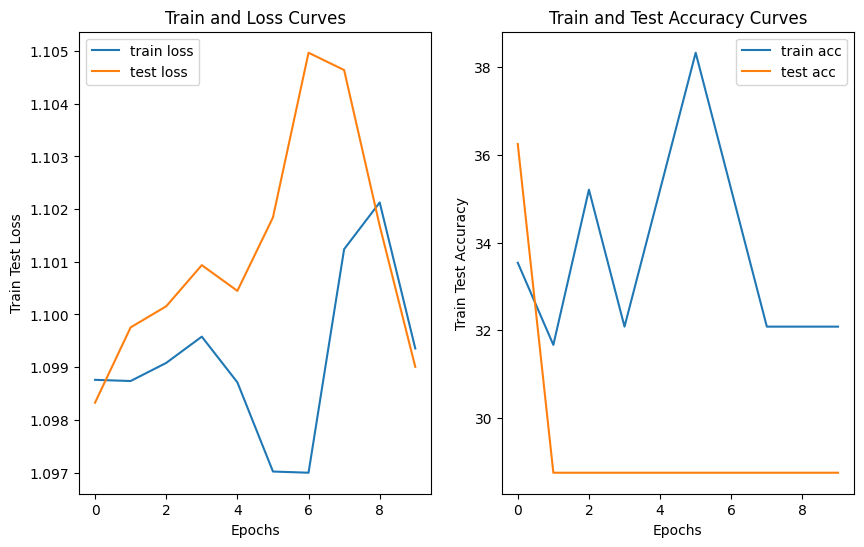

In [41]:
train_loss, test_loss = np.array(results['train_loss_epoch']), np.array(results['test_loss_epoch'])
train_acc , test_acc  = np.array(results['train_acc_epoch']), np.array(results['test_acc_epoch'])
epochs = len(train_loss)
plot_loss_curves(epochs, train_loss, test_loss, train_acc, test_acc)    

In [96]:
# Pipeline for infernce Mode "Predicting on custome images"

def Predict_Custom_Images(model:torch.nn.Module,
                          image_path : str,
                          device : torch.device = None):
    
    """Function taking image path as a string and a model and returns model_prediction and confedence level"""
    transform = transforms.Compose([
        transforms.Resize(size = (224, 224), antialias=True),
        # transforms.ToTensor()
    ])
    
    # reading an image using its path
    img = torchvision.io.read_image(image_path).type(torch.float32) / 255
    # Transforming our image into the right requirnments for our model
    img = transform(img)
 
    # try :
    #     model.to(device)
    # except :
    #     print(f"you are not specifing and device and you are now working on the cpu")
    #     model.to('cpu')
 
 
    # Making our model into the inference_mode so our grades does not change
    model.eval()
    with torch.inference_mode():
        # Calculating the raw logits 
        raw_logits = model(img.unsqueeze(0))

    # Converting the raw logits into prediction probabilities and then into prediction labels
    prediction_probability = torch.softmax(raw_logits, dim = 1).max().item()
    prediction_label = torch.softmax(raw_logits, dim = 1).argmax(dim = 1).item()

    print(f"prediction label : {class_names[prediction_label]}\nConfidence : {(prediction_probability * 100):.2f}%")
    return prediction_label, prediction_probability

In [99]:
image_path = './Created_Data/pizza_sushi_steak_20 percent/train/sushi/1888136.jpg'
prediction_label, prediction_probabilty = Predict_Custom_Images(model = model_0,
                                         image_path = image_path)

prediction label : pizza
Confidence : 33.55%
